In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# Define the objective function
def objective_function(x):
    return (x[0] - 1)**2 + (x[1] - 2.5)**2

# Define the inequality constraints
def constraint1(x):
    return x[0] - 2*x[1] + 2

def constraint2(x):
    return -x[0] - 2*x[1] + 6

def constraint3(x):
    return -x[0] + 2*x[1] + 2

In [3]:
# Define bounds for variables
bounds = [(0, None), (0, None)]

# Define the constraints
constraints = (
    {'type': 'ineq', 'fun': constraint1},
    {'type': 'ineq', 'fun': constraint2},
    {'type': 'ineq', 'fun': constraint3}
)

In [13]:
# Initial guess
initial_guess = [0, 0]

# Solve the quadratic program
result = minimize(objective_function, initial_guess, bounds=bounds, constraints=constraints)

# Print the result
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.799999999999998
       x: [ 1.400e+00  1.700e+00]
     nit: 4
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 12
    njev: 4


/var/folders/k4/818s6pw91s11_s19pmndzl4h0000gn/T/ipykernel_52651/3954512605.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=20, cmap='viridis', label='Objective Function')


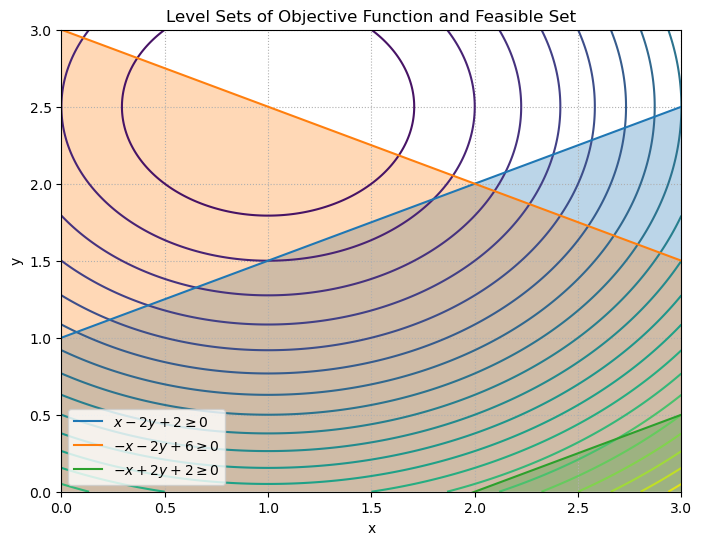

In [28]:
# Plot level sets of the objective function
x = np.linspace(0, 3, 400)
y = np.linspace(0, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 1)**2 + (Y - 2.5)**2

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis', label='Objective Function')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,3])
plt.ylim([0,3])

# Plot feasible set
x_feasible = np.linspace(0, 3, 400)
y1_feasible = (x_feasible + 2) / 2
y2_feasible = (-x_feasible + 6) / 2
y3_feasible = (x_feasible - 2) / 2

plt.plot(x_feasible, y1_feasible, label=r'$x - 2y + 2 \geq 0$')
plt.plot(x_feasible, y2_feasible, label=r'$-x - 2y + 6 \geq 0$')
plt.plot(x_feasible, y3_feasible, label=r'$-x + 2y + 2 \geq 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.fill_between(x_feasible, 0, y1_feasible, where=(y1_feasible >= 0), interpolate=True, alpha=0.3)
plt.fill_between(x_feasible, 0, y2_feasible, where=(y2_feasible >= 0), interpolate=True, alpha=0.3)
plt.fill_between(x_feasible, 0, y3_feasible, where=(y3_feasible >= 0), interpolate=True, alpha=0.3)

plt.grid(linestyle=":")
plt.legend()
plt.title('Level Sets of Objective Function and Feasible Set')
plt.show()


/var/folders/k4/818s6pw91s11_s19pmndzl4h0000gn/T/ipykernel_52651/2741832320.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, levels=20, cmap='viridis', label='Objective Function')


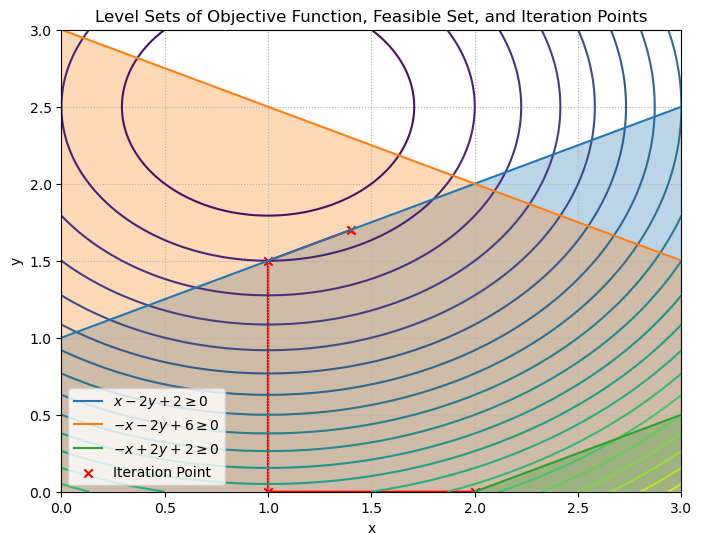

In [39]:
# Iteration points
iteration_points = [(2, 0), (1, 0), (1, 1.5), (1.4, 1.7)]

# Plot level sets of the objective function
x = np.linspace(0, 3, 400)
y = np.linspace(0, 3, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 1)**2 + (Y - 2.5)**2

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap='viridis', label='Objective Function')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,3])
plt.ylim([0,3])

# Plot feasible set
x_feasible = np.linspace(0, 3, 400)
y1_feasible = (x_feasible + 2) / 2
y2_feasible = (-x_feasible + 6) / 2
y3_feasible = (x_feasible - 2) / 2

plt.plot(x_feasible, y1_feasible, label=r'$x - 2y + 2 \geq 0$')
plt.plot(x_feasible, y2_feasible, label=r'$-x - 2y + 6 \geq 0$')
plt.plot(x_feasible, y3_feasible, label=r'$-x + 2y + 2 \geq 0$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.fill_between(x_feasible, 0, y1_feasible, where=(y1_feasible >= 0), interpolate=True, alpha=0.3)
plt.fill_between(x_feasible, 0, y2_feasible, where=(y2_feasible >= 0), interpolate=True, alpha=0.3)
plt.fill_between(x_feasible, 0, y3_feasible, where=(y3_feasible >= 0), interpolate=True, alpha=0.3)
    
# Plot iteration points
for i in range(len(iteration_points) - 1):
    x_start, y_start = iteration_points[i]
    x_end, y_end = iteration_points[i + 1]
    
    plt.scatter(x_start, y_start, color='red', marker='x')
    plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, width=0.005, head_width=0.05, head_length=0.001, 
              fc='red', ec='red')

# Plot the last iteration point
x_last, y_last = iteration_points[-1]
plt.scatter(x_last, y_last, color='red', marker='x', label='Iteration Point')   
    
# Additional plot settings
plt.grid(linestyle=":")
plt.legend(loc="lower left")
plt.title('Level Sets of Objective Function, Feasible Set, and Iteration Points')
plt.show()